---
# Numpy, Pandas, Matplotlib 基礎操作
## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

---
## Read/Write File
**透過 Python 的 `open()` 函數可以完成最基本的檔案讀取或寫入。模式可以分為以下這幾種:**

模式  | 功能                         |
:-----|:----------------------------|
r    | 只能讀取                      |
w    | 只能寫入 (若檔案存在則清空取代) |
x    | 只能寫入 (若檔案存在則會失敗)   |
a    | 在現有的檔案最尾端新增資料      |
r+   | 讀取加寫入                     |

**讓我們來看看實際讀取資料的執行方式**
> 溫馨提醒，在你讀取某個檔案的時候，首先必須確保它沒有被任何程式打開哦

In [2]:
print('===================use readline()===============')
file = open('common files/sample.txt', 'r', encoding="utf8")
print(file.readline())
print(file.readline())
print(file.readline())
file.close()

print()
print('===================use readlines()==============')
file = open('common files/sample.txt', 'r', encoding="utf8")
print(file.readlines())
file.close()

print()
print('===================use read()===================')
file = open('common files/sample.txt', 'r', encoding="utf8")
print(file.read())
file.close()

===================use readline()===============
不講武德，

來騙，

搞偷襲！

===================use readlines()==============
['不講武德，\n', '來騙，\n', '搞偷襲！']

===================use read()===================
不講武德，
來騙，
搞偷襲！


**接下來我們看看如何對檔案寫入多一串字串**

In [3]:
file = open('common files/sample.txt', 'a', encoding="utf8") # a: 於檔案最尾端加入content
file.write('\nby 馬家刀法')
file.close()

# 寫入之後我們來檢查整個檔案的內容
file = open('common files/sample.txt', 'r', encoding="utf8") # a: 於檔案最尾端加入content
print(file.read())
file.close()

不講武德，
來騙，
搞偷襲！
by 馬家刀法


**接下來我們進入稍微高階一點的寫法。上述的寫法有個壞處，如果最後忘記放 `file.close()`，那檔案會一直開著並且佔用到作業系統的資源。使用 `with open() as` 會自動將區塊內的程式碼執行完之後呼叫 `close()`**

In [4]:
with open('common files/sample.txt', 'r', encoding="utf8") as f:
    print(f.read())

不講武德，
來騙，
搞偷襲！
by 馬家刀法


### Exercise
* 1. **可以發現當前的 sample.txt 有著四行字串的內容, 如果開啟檔案持續執行超過4次的 `readline()`, 會發生什麼事? 請做個實驗看看。**
* 2. **嘗試呼叫一個不存在的檔案, 如 idontexist.txt, 用 `open()` 以及 `with open() as` 的方法讀取, 看看這會發生什麼情況**
* 3. **利用 `readlines()` 讀取檔案內容, 嘗試將會傳回來的 list 顯示成和 `read()` 一樣的 output**

---
## Numpy Basics
**`Numpy` 是利用 Python 分析或處理資料時很常會使用到的一個套件，主要能提供的優勢是可以快速簡易的對矩陣做數學運算，以下就展示一些基礎操作。**

In [5]:
# 宣告一個numpy矩陣
array_1D = np.array([1,2,3])
array_2D = np.array([[4,5,6],[7,8,9]])

# print 出來看看長什麼樣子
print('array_1D:\n{}'.format(array_1D))
print('array_2D:\n{}'.format(array_2D))

array_1D:
[1 2 3]
array_2D:
[[4 5 6]
 [7 8 9]]


**我們還可以透過 `numpy` 一些內建的函數查看 `numpy` 矩陣的資訊，如:**

In [6]:
#觀察矩陣的維度、形狀、元數個數、資料形態
print('dimension: {}'.format(array_2D.ndim))  # array_2D.ndim
print('shape: {}'.format(array_2D.shape)) #array_2D.shape
print('size: {}'.format(array_2D.size)) #array_2D.size
print('data type: {}'.format(array_2D.dtype)) #array_2D.dtype

# 我們也可以透過 type() 來知道一個變數目前的形態 (這很常會用到)
print('type of array_2: {}'.format(type(array_2D))) #type(array_2D)

dimension: 2
shape: (2, 3)
size: 6
data type: int32
type of array_2: <class 'numpy.ndarray'>


**要知道 `numpy` 矩陣其實不只可以存放只有數字的矩陣，含有文字的矩陣一樣行得通。這裡也展示一下如何在一個變數 list 和 `numpy` 矩陣之間互相轉換。**

In [7]:
# 定義一個 文字 list
words = ['a', 'b', 'c']
# 檢查 words 的形態
print('type of words: ')
print(type(words))
print(words, end='\n\n')

# 轉換成 numpy
np_words = np.array(words)
print('type of np_words: ')
print(type(np_words))
print(np_words, end='\n\n')

# 將numpy 轉換成 list
list_words = np_words.tolist()
print('type of list_words: ')
print(type(list_words))
print(list_words, end='\n\n')

type of words: 
<class 'list'>
['a', 'b', 'c']

type of np_words: 
<class 'numpy.ndarray'>
['a' 'b' 'c']

type of list_words: 
<class 'list'>
['a', 'b', 'c']



**此外, 我們也可以對 `numpy` 矩陣的元素進行資料心態的轉換, 以下程式碼是將 integer 形態的矩陣轉換成 float 形態的矩陣之方法**

In [8]:
print('before conversion: {}'.format(array_1D.dtype))
print(array_1D)
array_1D = array_1D.astype('float') # or astype(np.float32)
print('after conversion: {}'.format(array_1D.dtype))
print(array_1D)

before conversion: int32
[1 2 3]
after conversion: float64
[1. 2. 3.]


In [9]:
# 為了省去資源，沒用到的變數可以將它在記憶體上釋放
# 尤其在進行大筆資料的處理，這個動作可以盡可能地避免出現 memory error類的錯誤訊息
# 要留意的是，進行釋放之後該變數就不能再繼續使用 (除非你重新對之定義)
del array_1D, array_2D
del words, np_words, list_words

**接下來我們來看一些 `numpy` 矩陣的基本運算:**
* **先定義兩個同樣大小的2維矩陣變數**

In [10]:
# 先定義兩個一樣大小的矩陣
a = np.array([[1,2,3], [4,5,6]])
b = np.array([[4,5,6], [7,8,9]])

print('a:')
print(a)
print('b:')
print(b)

a:
[[1 2 3]
 [4 5 6]]
b:
[[4 5 6]
 [7 8 9]]


* **矩陣元素之間的運算 (element-wise operation)**

In [11]:
print('addition:')
print(a + b, end='\n\n') # or np.add(a, b)
print('subtraction:') 
print(a - b, end='\n\n') # or np.subtract(a, b)
print('multiplication:') 
print(a * b, end='\n\n') # or np.multiply(a, b)
print('division:')
print(a / b) # or np.divide(a, b)

addition:
[[ 5  7  9]
 [11 13 15]]

subtraction:
[[-3 -3 -3]
 [-3 -3 -3]]

multiplication:
[[ 4 10 18]
 [28 40 54]]

division:
[[0.25       0.4        0.5       ]
 [0.57142857 0.625      0.66666667]]


* **矩陣運算 (matrix operation)**

In [12]:
print('dot product: ')
print(np.dot(a, b.T))

dot product: 
[[ 32  50]
 [ 77 122]]


* **其他換取矩陣統計資訊等等的方法**

In [13]:
print('summation: {}'.format(np.sum(a)))
print('minimum: {}'.format(np.min(a)))
print('maximum: {}'.format(np.max(a)))
print('median: {}'.format(np.median(a)))
print('mean: {}'.format(np.mean(a)))
print('transpose: ')
print(a.T)

summation: 21
minimum: 1
maximum: 6
median: 3.5
mean: 3.5
transpose: 
[[1 4]
 [2 5]
 [3 6]]


**在資料分析和處理的時候，很常會遇到需要將兩個矩陣拼接在一起的情況，我們稱之為 concatenation, 請參考下面使用 `numpy.concatenate` 的程式碼**

In [14]:
# 先 print 出剛剛用到的兩個矩陣, 方便檢視
print('a:')
print(a)
print('b:')
print(b, end='\n\n')

# 進行 row 與 row 之間的拼接
print('row concatenation:')
print(np.concatenate([a, b], axis=0), end='\n\n')

# 進行 column 與 column 之間的拼接
print('column concatenation:')
print(np.concatenate([a, b], axis=1))

a:
[[1 2 3]
 [4 5 6]]
b:
[[4 5 6]
 [7 8 9]]

row concatenation:
[[1 2 3]
 [4 5 6]
 [4 5 6]
 [7 8 9]]

column concatenation:
[[1 2 3 4 5 6]
 [4 5 6 7 8 9]]


**你可能會提出的疑問: 如果變數的矩陣超過2維, 比方說3維, 要對3維矩陣在第3維做拼接該怎麼辦?**
* **關建在於 `numpy.concatenate` 函數的一個 argument —— axis, 輸入使用數字作為代表, 0代表第一個維度(稱之為 row), 1代表第二個維度(稱之為 column), 三維的情況就是設axis為2即可, 以此類推。**

**`numpy` 還提供我們對 `numpy` 矩陣內容做移位的功能, 如下:**

In [15]:
# 先 print 出會用到矩陣, 方便檢視
print('a:')
print(a, end='\n\n')

# 將第二個 row 移至 第一個 row
print('swap 1st and 2nd rows')
a[[0, 1]] = a[[1, 0]]
print(a, end='\n\n')

# 將第二個 row 移至 第一個 row
print('swap 1st and 2nd columns')
a[:,[0, 1]] = a[:,[1, 0]]
print(a, end='\n\n')

a:
[[1 2 3]
 [4 5 6]]

swap 1st and 2nd rows
[[4 5 6]
 [1 2 3]]

swap 1st and 2nd columns
[[5 4 6]
 [2 1 3]]



In [16]:
# 為了省去資源，沒用到的變數可以將它在記憶體上釋放
# 尤其在進行大筆資料的處理，這個動作可以盡可能地避免出現 memory error類的錯誤訊息
# 要留意的是，進行釋放之後該變數就不能再繼續使用 (除非你重新對之定義)
del a, b

### Exercise
* 1. **定義出兩個一樣大小的 `numpy` 矩陣以及普通的 list 變數(所以有總計4個變數), 個別對他們做 a+b 的預算, 試說明 numpy 的加法運算以及 list 的加法運算差別在哪裡?**

---
## Pandas Basics
### 資料讀取、獲取基本資訊方法
**`Pandas` 也是一個在資料分析上很常用到的一個套件，其底下的物件 `DataFrame` 是最常被使用到的物件之一。在進入 Pandas 基礎操作之前，先使用 `Pandas.DataFrame` 讀取 csv 檔案內容。**

In [17]:
df = pd.read_csv('common files/107_salary.csv')
print(df.columns, end='\n\n') # 顯示當前 dataframe 的 features 有哪些

# 我們也可以將這些 features 存成一個 list 變數
features = df.columns.tolist()
print(features)

Index(['產業類別', '公司代號', '公司名稱', '員工薪資總額(仟元)', '員工人數-加權平均(人)', '員工薪資-平均數(仟元/人)',
       '每股盈餘(元/股)', '同業公司員工薪資-平均數(仟元/人)', '同業公司平均每股盈餘(元/股)',
       '非經理人之全時員工薪資平均數未達50萬元', '公司EPS獲利表現較同業為佳，惟非經理人之全時員工薪資平均數低於同業水準',
       '公司EPS較前一年度成長，惟非經理人之全時員工薪資平均數較前一年度減少', '公司經營績效與員工薪酬之關聯性及合理性說明'],
      dtype='object')

['產業類別', '公司代號', '公司名稱', '員工薪資總額(仟元)', '員工人數-加權平均(人)', '員工薪資-平均數(仟元/人)', '每股盈餘(元/股)', '同業公司員工薪資-平均數(仟元/人)', '同業公司平均每股盈餘(元/股)', '非經理人之全時員工薪資平均數未達50萬元', '公司EPS獲利表現較同業為佳，惟非經理人之全時員工薪資平均數低於同業水準', '公司EPS較前一年度成長，惟非經理人之全時員工薪資平均數較前一年度減少', '公司經營績效與員工薪酬之關聯性及合理性說明']


**Pandas 提供內建函數讓我們可以快速檢視前面或後面幾筆的資料**

In [18]:
df.head(3) # show 出前面3筆資料，如果沒有填入數字，會預設秀出前5筆

,產業類別,公司代號,公司名稱,員工薪資總額(仟元),員工人數-加權平均(人),員工薪資-平均數(仟元/人),每股盈餘(元/股),同業公司員工薪資-平均數(仟元/人),同業公司平均每股盈餘(元/股),非經理人之全時員工薪資平均數未達50萬元,公司EPS獲利表現較同業為佳，惟非經理人之全時員工薪資平均數低於同業水準,公司EPS較前一年度成長，惟非經理人之全時員工薪資平均數較前一年度減少,公司經營績效與員工薪酬之關聯性及合理性說明
0,半導體業,2454,聯發科,"16,650,764","6,155","2,705",13.26,"1,228",7.24,NaN,NaN,NaN,NaN
1,半導體業,3034,聯詠,"5,133,164","2,019","2,542",10.50,"1,228",7.24,NaN,NaN,NaN,NaN
2,其他電子業,2354,鴻準,"393,140",160,"2,457",6.47,"1,179",7.41,NaN,NaN,NaN,NaN


In [19]:
df.tail(3) # show 出後面3筆資料，如果沒有填入數字，會預設秀出後5筆

,產業類別,公司代號,公司名稱,員工薪資總額(仟元),員工人數-加權平均(人),員工薪資-平均數(仟元/人),每股盈餘(元/股),同業公司員工薪資-平均數(仟元/人),同業公司平均每股盈餘(元/股),非經理人之全時員工薪資平均數未達50萬元,公司EPS獲利表現較同業為佳，惟非經理人之全時員工薪資平均數低於同業水準,公司EPS較前一年度成長，惟非經理人之全時員工薪資平均數較前一年度減少,公司經營績效與員工薪酬之關聯性及合理性說明
850,觀光事業,2702,華園,"34,347",89,386,2.08,552,1.38,V,V,NaN,依據106年工業及服務業受僱員工全年總薪資中位數及分布統計結果，住宿及餐飲業全年總薪資中位數...
851,觀光事業,2722,夏都,"156,832",430,365,0.19,552,1.38,V,NaN,NaN,"本公司為一般旅館業及餐館業,著重現場服務品質及配合政府推行建教合作,偏重於基層服人員較多,故..."
852,食品工業,1235,興泰,"8,890",26,342,1.25,776,2.53,V,NaN,NaN,1.本公司是成立40多年的老廠，老員工已相繼退休，目前員工為年資較淺之新員工，薪資不若已退休...


**有時會遇上 column 太多(比如有100個column), 在介面上沒辦法全部秀出的問題, 此時可以透過下列指令強制讓 `DataFrame` 將所有 column 顯示出來**

In [20]:
pd.set_option('display.max_columns', None)

**快速獲取當前報表的資訊**

In [21]:
print('shape: {}'.format(df.shape)) # 顯示 pandas dataframe 的大小

# display 是在 Jupyter 裡除了print()之外可以顯示在output區塊的方法 (來自 IPython.core 的內建函數)
display(df.info()) # 顯示當前報表的基本資訊

shape: (853, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 853 entries, 0 to 852
Data columns (total 13 columns):
產業類別                                    853 non-null object
公司代號                                    853 non-null int64
公司名稱                                    853 non-null object
員工薪資總額(仟元)                              853 non-null object
員工人數-加權平均(人)                            853 non-null object
員工薪資-平均數(仟元/人)                          853 non-null object
每股盈餘(元/股)                               853 non-null float64
同業公司員工薪資-平均數(仟元/人)                      853 non-null object
同業公司平均每股盈餘(元/股)                         853 non-null float64
非經理人之全時員工薪資平均數未達50萬元                    66 non-null object
公司EPS獲利表現較同業為佳，惟非經理人之全時員工薪資平均數低於同業水準    142 non-null object
公司EPS較前一年度成長，惟非經理人之全時員工薪資平均數較前一年度減少     0 non-null float64
公司經營績效與員工薪酬之關聯性及合理性說明                   207 non-null object
dtypes: float64(3), int64(1), object(9)
memory usage: 86.8+ KB


None

**針對其中一個欄位觀察分佈**

In [22]:
df['員工薪資-平均數(仟元/人)'].value_counts()

542      6
520      6
647      6
860      5
747      5
        ..
1,390    1
802      1
537      1
843      1
407      1
Name: 員工薪資-平均數(仟元/人), Length: 556, dtype: int64

**可以發現有556中可能的數字, 資料中有:**
* **6筆平均薪資為520仟元的資料、**
* **5筆平均薪資為542仟元的資料、**
* **以此類推。**

**我們也可以對上述的指令在加上 `describe()` 來獲得更精簡的統計數據, 如 中位數、平均數 等等**

In [23]:
df['員工薪資-平均數(仟元/人)'].value_counts().describe()

count    556.000000
mean       1.534173
std        0.851444
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        6.000000
Name: 員工薪資-平均數(仟元/人), dtype: float64

**為了方便操作，我們也可以更換報表的欄位名稱，以下指令會將所有欄位名字切換成英文名字**

In [24]:
# 建立欄位名稱 list
# 參考自 https://blog.techbridge.cc/2019/07/26/how-to-use-taiwan-salary-data-to-do-python-data-analytics-and-data-visualization/
headers = ['industry','company_code', 'company_people_count', 'company_name', 
           'company_total_salary', 'company_average_salary', 'company_eps', 
           'industry_average_salary', 'industry_average_eps', 'is_under_50', 
           'high_eps_low_salary', 'growth_but_low_salary', 'low_salary_reason']

# 直接取代當前所有欄位名稱
df.columns = headers
df.columns.tolist() # 檢查更該欄位名稱之後的欄位 list

['industry',
 'company_code',
 'company_people_count',
 'company_name',
 'company_total_salary',
 'company_average_salary',
 'company_eps',
 'industry_average_salary',
 'industry_average_eps',
 'is_under_50',
 'high_eps_low_salary',
 'growth_but_low_salary',
 'low_salary_reason']

### Null 值處理
**從報表可以發現到有些欄位有null值的存在，接下來會展現一些解決null的前處理手法:**

In [25]:
# 檢查每一行資料是否存在null
df.isnull()

,industry,company_code,company_people_count,company_name,company_total_salary,company_average_salary,company_eps,industry_average_salary,industry_average_eps,is_under_50,high_eps_low_salary,growth_but_low_salary,low_salary_reason
0,False,False,False,False,False,False,False,False,False,True,True,True,True
1,False,False,False,False,False,False,False,False,False,True,True,True,True
2,False,False,False,False,False,False,False,False,False,True,True,True,True
3,False,False,False,False,False,False,False,False,False,True,True,True,True
4,False,False,False,False,False,False,False,False,False,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
848,False,False,False,False,False,False,False,False,False,False,True,True,False
849,False,False,False,False,False,False,False,False,False,False,True,True,False
850,False,False,False,False,False,False,False,False,False,False,False,True,False
851,False,False,False,False,False,False,False,False,False,False,True,True,False


**可以留意到每一行每一列都有 True 或 False 的值，這對應著該欄位的值是否為null。我們可以發現這可讀性非常有限，一般我們可以透過下面的指令來直接統計各欄位擁有多少 null 值**

In [26]:
df.isnull().sum()

industry                     0
company_code                 0
company_people_count         0
company_name                 0
company_total_salary         0
company_average_salary       0
company_eps                  0
industry_average_salary      0
industry_average_eps         0
is_under_50                787
high_eps_low_salary        711
growth_but_low_salary      853
low_salary_reason          646
dtype: int64

**經過上面的指令可以發現大部分欄位都沒有 null 值，剩下有null值的欄位分別為:**
* **1. is_under_50 —— 787個null值**
* **2. high_eps_low_salary —— 711個null值**
* **3. growth_but_low_salary —— 853個null值**
* **4. low_salary_reason —— 646個null值**

**面對null值我們可以視不一樣的情況採取對應的處理方式，比較常見的方法有:**
* **1. 如果有一個欄位，全部都是null值，可以考慮將該欄位去除掉**

In [27]:
# 以下欄位全部都是null值，這裡下指令將該欄位去除掉
df = df.drop(['growth_but_low_salary'], axis=1)
display(df.shape) # 檢查報表的大小，可以發現column數少了一個 (因為已經去除掉了)
df.columns.tolist() # 顯示所有剩下的欄位

(853, 12)

['industry',
 'company_code',
 'company_people_count',
 'company_name',
 'company_total_salary',
 'company_average_salary',
 'company_eps',
 'industry_average_salary',
 'industry_average_eps',
 'is_under_50',
 'high_eps_low_salary',
 'low_salary_reason']

* **2. 如果 null 值的筆數很少，可以採取刪去法，指令: `df.dropna()`, 細節可參考 https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html**

In [28]:
df_drop = df.dropna().reset_index() # 將含有null值的資料刪掉，利用reset index來重新調整刪除資料之後的資料順序
display(df_drop.shape) # 顯示刪除後報表的shape
display(df_drop.tail(3)) # 顯示後面3筆資料
df_drop.isnull().sum()

(10, 13)

,index,industry,company_code,company_people_count,company_name,company_total_salary,company_average_salary,company_eps,industry_average_salary,industry_average_eps,is_under_50,high_eps_low_salary,low_salary_reason
7,834,電腦及週邊設備業,4916,事欣科,"37,636",84,448,3.06,"1,200",2.73,V,V,整體員工之年平均所得之所以未達 50萬元，係因直接員工人數為職員之2倍，本公司於107年營收...
8,847,貿易百貨,2915,潤泰全球,"353,680",866,408,13.55,788,3.29,V,V,"本公司獲利中轉投資收益佔比較高,若排除轉投資收益則獲利未能優於同業;又所營紡織廠及量販店等屬..."
9,850,觀光事業,2702,華園,"34,347",89,386,2.08,552,1.38,V,V,依據106年工業及服務業受僱員工全年總薪資中位數及分布統計結果，住宿及餐飲業全年總薪資中位數...


index                      0
industry                   0
company_code               0
company_people_count       0
company_name               0
company_total_salary       0
company_average_salary     0
company_eps                0
industry_average_salary    0
industry_average_eps       0
is_under_50                0
high_eps_low_salary        0
low_salary_reason          0
dtype: int64

* **3. 如果是字串形態的資料，null值很可能只是因為填寫者沒有填寫那個欄位，此時可以用空字串(String.Empty)去取代它，指令: `df.replace()`**

In [29]:
# 以下欄位是填寫感想的欄位，null值很可能只是因為填寫者沒有填寫感想，所以我們也可以針對該欄位的null值以空字串來取代
df['low_salary_reason'] = df['low_salary_reason'].replace(np.nan, '', regex=True)
display(df.shape) # 顯示刪除後報表的shape
display(df.head(3)) # 顯示後面3筆資料
df.isnull().sum()

(853, 12)

,industry,company_code,company_people_count,company_name,company_total_salary,company_average_salary,company_eps,industry_average_salary,industry_average_eps,is_under_50,high_eps_low_salary,low_salary_reason
0,半導體業,2454,聯發科,"16,650,764","6,155","2,705",13.26,"1,228",7.24,NaN,NaN,
1,半導體業,3034,聯詠,"5,133,164","2,019","2,542",10.50,"1,228",7.24,NaN,NaN,
2,其他電子業,2354,鴻準,"393,140",160,"2,457",6.47,"1,179",7.41,NaN,NaN,


industry                     0
company_code                 0
company_people_count         0
company_name                 0
company_total_salary         0
company_average_salary       0
company_eps                  0
industry_average_salary      0
industry_average_eps         0
is_under_50                787
high_eps_low_salary        711
low_salary_reason            0
dtype: int64

* **4. 如果是數字形態的資料，且不適合用刪去法，可以利用剩下的非null值資料取得平均數、中位數、或是0等等來代替null值資料，指令: `df.fillna()`**

In [30]:
# 因為範例數字的欄位沒有null值，所以下面的指令沒有效果
df['company_average_salary'] = df['company_average_salary'].fillna(0) # 用 0 取代 null值
display(df.shape) # 顯示刪除後報表的shape
display(df.head(3)) # 顯示後面3筆資料
df.isnull().sum()

(853, 12)

,industry,company_code,company_people_count,company_name,company_total_salary,company_average_salary,company_eps,industry_average_salary,industry_average_eps,is_under_50,high_eps_low_salary,low_salary_reason
0,半導體業,2454,聯發科,"16,650,764","6,155","2,705",13.26,"1,228",7.24,NaN,NaN,
1,半導體業,3034,聯詠,"5,133,164","2,019","2,542",10.50,"1,228",7.24,NaN,NaN,
2,其他電子業,2354,鴻準,"393,140",160,"2,457",6.47,"1,179",7.41,NaN,NaN,


industry                     0
company_code                 0
company_people_count         0
company_name                 0
company_total_salary         0
company_average_salary       0
company_eps                  0
industry_average_salary      0
industry_average_eps         0
is_under_50                787
high_eps_low_salary        711
low_salary_reason            0
dtype: int64

### 重複值 (Duplicated Value) 處理
**處理完 null 值資料之後，我們也可以檢查一下資料集當中是否有重複的資料，指令: `df.duplicated`，詳情可參考https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html**

In [31]:
df.duplicated(keep='first').sum() # keep='first' 表示第一個重複的不算在重複筆數裡面

0

**可以發現這個資料集是沒有重複資料的，但如果有重複資料，我們也可以透過刪去法將重複資料刪掉**

In [32]:
# 因為範例資料沒有重複資料，所以下面的指令沒有效果
df = df.drop_duplicates(keep='first') # keep='first' 表示保留第一筆資料
df.duplicated(keep='first').sum() # 檢查報表是否有重複資料

0

### 欄位值轉換資料形態 (data type) 與 代替值
**除了取代 null 值資料，我們也可以對資料集的資料進行轉換資料形態 或者 取代某一個特定的值，以下為轉換字串形態的欄位成浮點數形態的欄位**

In [33]:
# 可以發現以下欄位的形態是字串形態
display(df['industry_average_salary'].dtypes)
df['industry_average_salary'] = df['industry_average_salary'].str.replace(',', '').astype(int)
#df[['industry_average_salary']] = pd.to_numeric(df[['industry_average_salary']])
display(df['industry_average_salary'].dtypes)
df['industry_average_salary'].head(3)

dtype('O')

dtype('int32')

0    1228
1    1228
2    1179
Name: industry_average_salary, dtype: int32

**像是下列兩個欄位，當中只會有兩種值: "V" or null 值，象徵著 True or False, 我們也可以對這些欄位做替換，方法如下**

In [34]:
# 先檢查目標欄位都多少可能值，結果會發現只有兩種 (一個為 "V" 一個為 null)
display(df['is_under_50'].value_counts())
display(df['high_eps_low_salary'].value_counts())

V    66
Name: is_under_50, dtype: int64

V    142
Name: high_eps_low_salary, dtype: int64

In [35]:
#  將 null 值全部以 False 作為取代, "V" 以 True 來代替
df['is_under_50'] = df['is_under_50'].fillna(False)
df['is_under_50'] = df['is_under_50'].replace("V", True)

df['high_eps_low_salary'] = df['high_eps_low_salary'].fillna(False)
df['high_eps_low_salary'] = df['high_eps_low_salary'].replace("V", True)

# 檢查該兩個欄位的可能值
display(df['is_under_50'].value_counts())
display(df['high_eps_low_salary'].value_counts())

False    787
True      66
Name: is_under_50, dtype: int64

False    711
True     142
Name: high_eps_low_salary, dtype: int64

In [36]:
# 檢查報表 null 值的情況，以及顯示前面3筆的資料
display(df.isnull().sum())
df.head(3)

industry                   0
company_code               0
company_people_count       0
company_name               0
company_total_salary       0
company_average_salary     0
company_eps                0
industry_average_salary    0
industry_average_eps       0
is_under_50                0
high_eps_low_salary        0
low_salary_reason          0
dtype: int64

,industry,company_code,company_people_count,company_name,company_total_salary,company_average_salary,company_eps,industry_average_salary,industry_average_eps,is_under_50,high_eps_low_salary,low_salary_reason
0,半導體業,2454,聯發科,"16,650,764","6,155","2,705",13.26,1228,7.24,False,False,
1,半導體業,3034,聯詠,"5,133,164","2,019","2,542",10.50,1228,7.24,False,False,
2,其他電子業,2354,鴻準,"393,140",160,"2,457",6.47,1179,7.41,False,False,


### 提取樣本 (Sampling)

In [37]:
# 抽取 資料集當中 30趴 的樣本
df_sample = df.sample(frac=0.3) 
print('sampling with fraction of 30 %: {}'.format(df_sample.shape))

sampling with fraction of 30 %: (256, 12)


In [38]:
# 我也可以指定要多少樣本
df_sample = df.sample(n=3)  # 取3筆樣本
print('sampling with 3 samples: {}'.format(df_sample.shape))

sampling with 3 samples: (3, 12)


In [39]:
# 我們也可以依照某個欄位的值去取每3個樣本
# 比如從各行業類別中取3個樣本
df_sample = df.groupby('industry', group_keys=False).apply(lambda x: x.sample(n=3)) 
display(df_sample.shape)
df_sample.head()

(84, 12)

,industry,company_code,company_people_count,company_name,company_total_salary,company_average_salary,company_eps,industry_average_salary,industry_average_eps,is_under_50,high_eps_low_salary,low_salary_reason
544,光電業,6164,華興電子,"37,595",57,660,0.22,816,1.04,False,False,
660,光電業,6131,悠克國際,"1,723",3,574,-8.40,816,1.04,False,False,
730,光電業,4956,光鋐,"241,161",454,531,-0.77,816,1.04,False,False,
47,其他,9930,中聯資源,"328,759",231,"1,423",3.36,780,3.69,False,False,
598,其他,1437,勤益投控,"18,087",29,624,1.23,780,3.69,False,False,


### 對 `dataframe` 做條件查詢 (Query)

In [40]:
# 查詢產業類別為光電業的資料
df_opto = df[df['industry'].isin(['光電業'])].reset_index()
display(df_opto.shape)
df_opto.head(3)

(65, 13)

,index,industry,company_code,company_people_count,company_name,company_total_salary,company_average_salary,company_eps,industry_average_salary,industry_average_eps,is_under_50,high_eps_low_salary,low_salary_reason
0,27,光電業,3563,牧德,"278,968",183,"1,524",30.43,816,1.04,False,False,
1,29,光電業,5234,達興材料,"487,852",321,"1,520",6.38,816,1.04,False,False,
2,73,光電業,3008,大立光,"7,718,049","5,912","1,305",181.67,816,1.04,False,False,非擔任主管職務之全時員工薪資-平均數 (不含外籍勞工):1702仟元/人


### 將 `dataframe` 轉換成 `numpy` 矩陣

In [41]:
# 將 DataFrame 所有的資料都轉入 numpy 矩陣
np_salaries = df.values
display(type(np_salaries)) # 檢查 np_salaries 的形態
display(np_salaries.shape)
np_salaries[:3] # 檢視前面3筆資料

numpy.ndarray

(853, 12)

array([['半導體業', 2454, '聯發科', '16,650,764', '6,155', '2,705', 13.26, 1228,
        7.24, False, False, ''],
       ['半導體業', 3034, '聯詠', '5,133,164', '2,019', '2,542', 10.5, 1228,
        7.24, False, False, ''],
       ['其他電子業', 2354, '鴻準', '393,140', '160', '2,457', 6.47, 1179, 7.41,
        False, False, '']], dtype=object)

In [42]:
# 我們也可以只轉入特定一個或幾個欄位到 numpy 矩陣上
np_seleted = df[['industry', 'company_people_count']].values
display(type(np_seleted)) # 檢查 np_seleted 的形態
display(np_seleted.shape)
np_seleted[:3] # 檢視前面3筆資料

numpy.ndarray

(853, 2)

array([['半導體業', '聯發科'],
       ['半導體業', '聯詠'],
       ['其他電子業', '鴻準']], dtype=object)

### 建立新的 `dataframe` 並存入 csv 檔案
**除了讀取檔案將其轉為 `Pandas.DataFrame` 形態，我們也可以自己建立一個 `Pandas.DataFrame` 並將它存入 csv 檔案之下。方法有很多種，下面展現的是其中一種方法。**

In [43]:
names = ['alice', 'bob', 'claire', 'damian', 'evangelous']
math_scores = [80, 90, 70, 85, 95]

# 建立一個 dictionary
data = {
    'name': names,
    'math': math_scores
}

# 建立 dataframe
df_self = pd.DataFrame(data=data)
display(df_self.shape)
df_self.head(3)

(5, 2)

,name,math
0,alice,80
1,bob,90
2,claire,70


In [44]:
# 寫入 csv 檔案
df_self.to_csv('sample.csv', index=False)

### Exercise
* **1. 參考 `Pandas.DataFrame` 作 Query 的程式碼，如果把 `reset_index()`拿掉並執行, 會發生什麼事? 和原本的結果有什麼不同?**
* **2. 參考寫入 `Pandas.DataFrame` 至 csv 檔的程式碼，如果將裡面的 argument —— index 拿掉或設為 True，會發生什麼事? 和原本的結果有什麼不同?**
* **3. 請嘗試將範例的 `Pandas.DataFrame` 作 Query，並得出 company_total_salary 欄位值 大於 5000 的資料 (Hint: 你可能會需要先轉換該欄位的資料形態)**

In [45]:
# 為了省去資源，沒用到的變數可以將它在記憶體上釋放
# 尤其在進行大筆資料的處理，這個動作可以盡可能地避免出現 memory error類的錯誤訊息
# 要留意的是，進行釋放之後該變數就不能再繼續使用 (除非你重新對之定義)
del df_drop, df_self, df_sample, df_opto

---
## Matplotlib Basics
**提到 Python 的資料視覺化，必定少不了 `Matplotlib` 這個套件，這裡也稍微介紹一下基本操作**

**在開始之前，先說明我們可能在顯示中文文字圖表會遇到的問題。因為 `Matplotlib` 本身是預設只顯示英文的，要顯示中文字首先要先對 `Matplotlib` 本身做一些調整。對於想要換不一樣的中文字體操作請參考 [ref 6](https://medium.com/marketingdatascience/%E8%A7%A3%E6%B1%BApython-3-matplotlib%E8%88%87seaborn%E8%A6%96%E8%A6%BA%E5%8C%96%E5%A5%97%E4%BB%B6%E4%B8%AD%E6%96%87%E9%A1%AF%E7%A4%BA%E5%95%8F%E9%A1%8C-f7b3773a889b)**

In [46]:
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['Microsoft JhengHei']
mpl.rcParams['font.serif'] = ['Microsoft JhengHei']

### 畫出長條圖、折線圖、圓餅圖
**`Matplotlib` 最基本的操作包括畫出長條圖(Bar Chart), 折線圖(Line Chart), 圓餅圖(Pie Chart)**

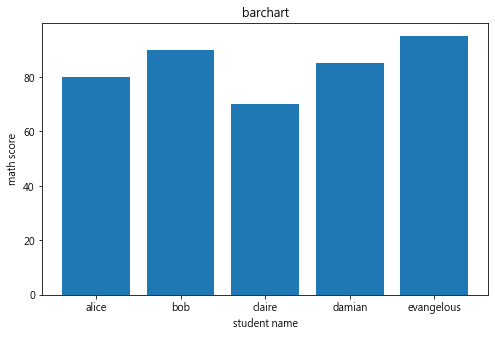

In [47]:
names = ['alice', 'bob', 'claire', 'damian', 'evangelous']
math_scores = [80, 90, 70, 85, 95]
sci_scores = [78, 60, 90, 80, 87]
his_scores = [50, 80, 70, 66, 71]
geo_scores = [72, 84, 75, 82, 79]
art_scores = [68, 63, 78, 89, 68]

plt.figure(figsize=(8,5)) # 設定圖片大小
plt.bar(names, math_scores)
plt.title('barchart')
plt.xlabel('student name', fontsize=10) # fontsize: 字體大小設定
plt.ylabel('math score', fontsize=10) # fontsize: 字體大小設定
plt.show() # 顯示結果

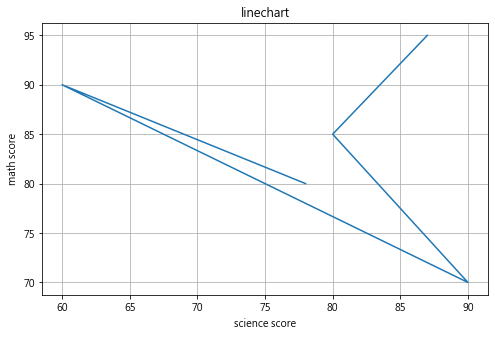

In [48]:
plt.figure(figsize=(8,5)) # 設定圖片大小
plt.plot(sci_scores, math_scores)
plt.title('linechart')
plt.xlabel('science score', fontsize=10) # fontsize: 字體大小設定
plt.ylabel('math score', fontsize=10)
plt.grid() # 顯示方格
plt.show() # 顯示結果

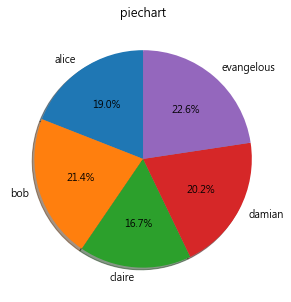

In [49]:
plt.figure(figsize=(5,5)) # 設定圖片大小
plt.pie(math_scores, labels=names, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('piechart')
plt.show() # 顯示結果

### 畫出多條長條圖
**畫成多條長條圖有分為很多種，這裡給出兩個範例產生兩種多條長條圖**
* **1. 堆疊型長條圖 (Stacked Bars)**

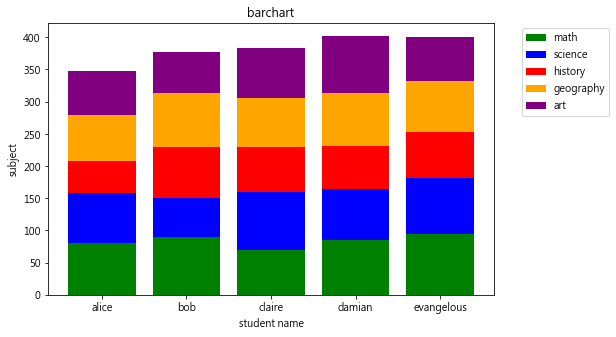

In [50]:
plt.figure(figsize=(8,5)) # 設定圖片大小

plt.bar(names, math_scores, color='green', label='math')

bottom = np.array(math_scores)
plt.bar(names, sci_scores, color='blue', label='science', bottom=bottom)

bottom += np.array(sci_scores)
plt.bar(names, his_scores, color='red', label='history', bottom=bottom)

bottom += np.array(his_scores)
plt.bar(names, geo_scores, color='orange', label='geography', bottom=bottom)

bottom += np.array(geo_scores)
plt.bar(names, art_scores, color='purple', label='art', bottom=bottom)

plt.title('barchart')
plt.xlabel('student name', fontsize=10) # fontsize: 字體大小設定
plt.ylabel('subject', fontsize=10) # fontsize: 字體大小設定
plt.legend(bbox_to_anchor=(1.05, 1)) # 將各線名稱顯示在圖標外面
plt.show() # 顯示結果

* **2. 普通多條長條圖 (Grouped Bars):**

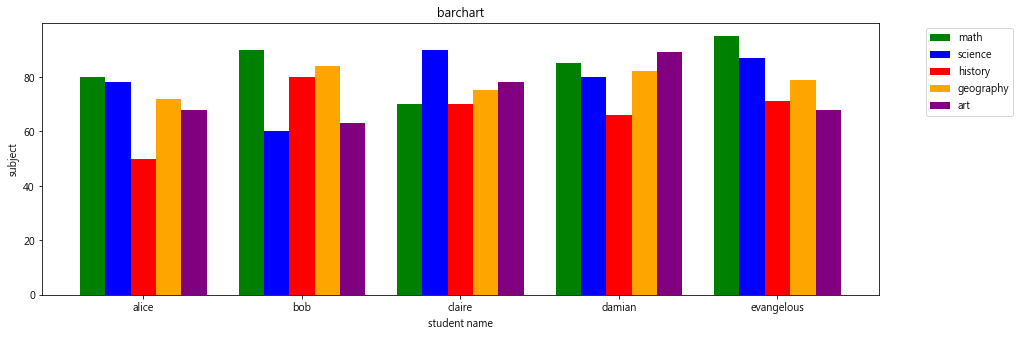

In [51]:
plt.figure(figsize=(15,5)) # 設定圖片大小

pos = np.array(range(5)) # 因為有 5個長條圖，所以這裡建一個 大小為 5 的 1 維矩陣
width, space = 0.8/5, 0.8/5
plt.bar(pos-2*space, math_scores, color='green', label='math', width=width)
plt.bar(pos-space, sci_scores, color='blue', label='science', width=width)
plt.bar(pos, his_scores, color='red', label='history', width=width)
plt.bar(pos+space, geo_scores, color='orange', label='geography', width=width)
plt.bar(pos+2*space, art_scores, color='purple', label='art', width=width)

plt.title('barchart')
plt.xticks(pos, names)
plt.xlabel('student name', fontsize=10) # fontsize: 字體大小設定
plt.ylabel('subject', fontsize=10) # fontsize: 字體大小設定
plt.legend(bbox_to_anchor=(1.05, 1)) # 將各線名稱顯示在圖標外面
plt.show() # 顯示結果

### 畫出多條折線圖
**在同一張圖裡如果要畫多條線，只需要再添加 `pyplot.plot` 就可以了。其中有些參數可以提供更好的客制化:**
* **1. color: 規定顏色**
* **2. marker: 規定線節點的形狀**
* **3. label: 該線條代表名稱**

**詳情可參考: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html**

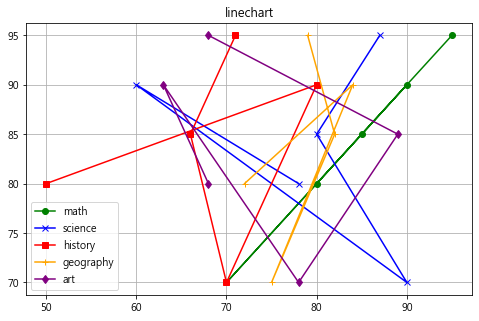

In [52]:
plt.figure(figsize=(8,5)) # 設定圖片大小

plt.plot(math_scores, math_scores, color='green', marker='o', label='math')
plt.plot(sci_scores, math_scores, color='blue', marker='x', label='science')
plt.plot(his_scores, math_scores, color='red', marker='s', label='history')
plt.plot(geo_scores, math_scores, color='orange', marker='+', label='geography')
plt.plot(art_scores, math_scores, color='purple', marker='d', label='art')

plt.title('linechart')
plt.legend(loc="lower left") # 將各線名稱顯示在左下角
plt.grid() # 顯示方格
plt.show() # 顯示結果

### 讀取圖片並顯示出來
**我們也可以使用 `Matplotlib` 來顯示圖片。**

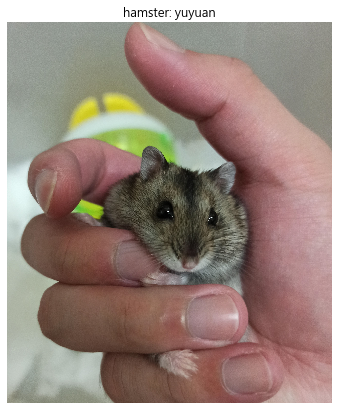

In [53]:
plt.figure(figsize=(7,7))
img = plt.imread('img/hamster.jpg') # 將圖片突入 numpy 矩陣
plt.imshow(img) #顯示圖片
plt.axis('off') #不顯示 x, y 軸
plt.title('hamster: yuyuan') #圖片標題
plt.show()

### Subplot
**很常會有需要對一張圖的空間放入多個子圖片的情況， `Matplotlib` 提供了兩種方式來完成: 透過 `pyplot.subplot` 或 `pyplot.subplots`。接下來會展現兩者如何實現上述情況。**
* **1. 使用 `pyplot.subplot`**

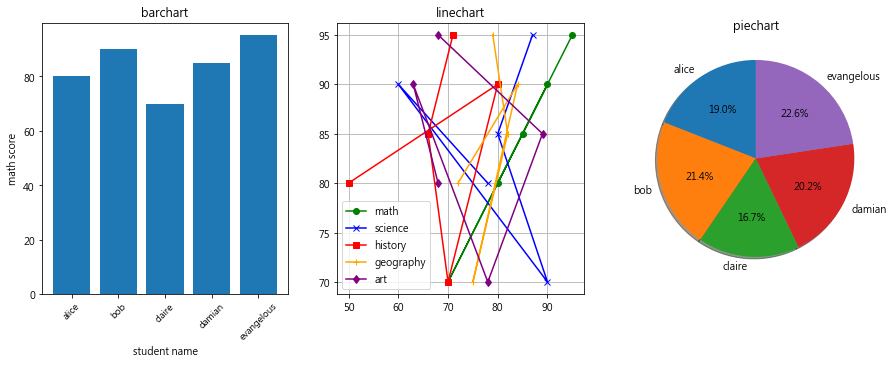

In [54]:
fig = plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1) # 呈現方式 一共 1個 row 三個圖， 第一個圖
plt.bar(names, math_scores)
plt.title('barchart')
plt.xlabel('student name', fontsize=10) # fontsize: 字體大小設定
plt.ylabel('math score', fontsize=10) # fontsize: 字體大小設定
plt.xticks(rotation=45, fontsize=9) # 將 x軸每個值以45度顯示

plt.subplot(1, 3, 2) # 呈現方式 一共 1個 row 三個圖， 第二個圖
plt.plot(math_scores, math_scores, color='green', marker='o', label='math')
plt.plot(sci_scores, math_scores, color='blue', marker='x', label='science')
plt.plot(his_scores, math_scores, color='red', marker='s', label='history')
plt.plot(geo_scores, math_scores, color='orange', marker='+', label='geography')
plt.plot(art_scores, math_scores, color='purple', marker='d', label='art')
plt.title('linechart')
plt.legend(loc="lower left") # 將各線名稱顯示在左下角
plt.grid() # 顯示方格

plt.subplot(1, 3, 3) # 呈現方式 一共 1個 row 三個圖， 第三個圖
plt.pie(math_scores, labels=names, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('piechart')

plt.savefig('3 graphs.jpg') # 儲存圖片
plt.show() # 顯示圖片

* **2. 使用 `pyplot.subplots`， 指令會和上面的方法有些不同，可以視習慣決定用哪一個**

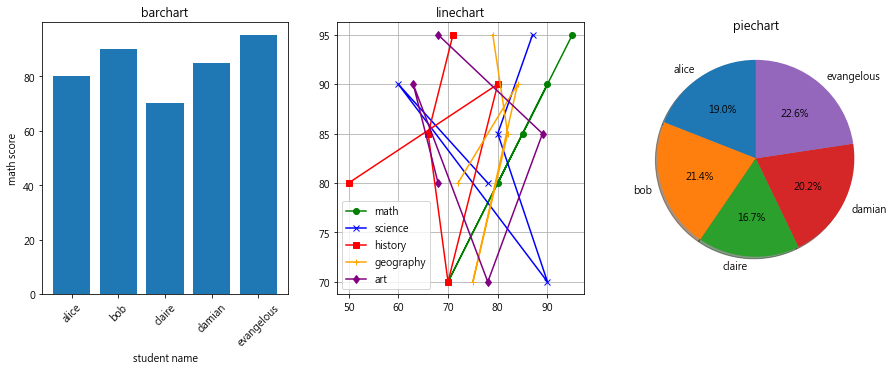

In [55]:
fig, axs = plt.subplots(1, 3, figsize=(15,5)) # 呈現方式 一共 1個 row 三個圖
# 計算方式 從左到右，由上至下
# 第一張圖
axs[0].bar(names, math_scores)
axs[0].set_title('barchart')
axs[0].set_xlabel('student name', fontsize=10) # fontsize: 字體大小設定
axs[0].set_ylabel('math score', fontsize=10) # fontsize: 字體大小設定
axs[0].tick_params(axis='x', labelrotation=45) # 將 x軸每個值以45度顯示

# 第二張圖
axs[1].plot(math_scores, math_scores, color='green', marker='o', label='math')
axs[1].plot(sci_scores, math_scores, color='blue', marker='x', label='science')
axs[1].plot(his_scores, math_scores, color='red', marker='s', label='history')
axs[1].plot(geo_scores, math_scores, color='orange', marker='+', label='geography')
axs[1].plot(art_scores, math_scores, color='purple', marker='d', label='art')
axs[1].set_title('linechart')
axs[1].legend(loc="lower left") # 將各線名稱顯示在左下角
axs[1].grid() # 顯示方格

# 第一張圖
axs[2].pie(math_scores, labels=names, autopct='%1.1f%%', shadow=True, startangle=90)
axs[2].set_title('piechart')

plt.show()

### 顯示 `Pandas.DataFrame` 分佈

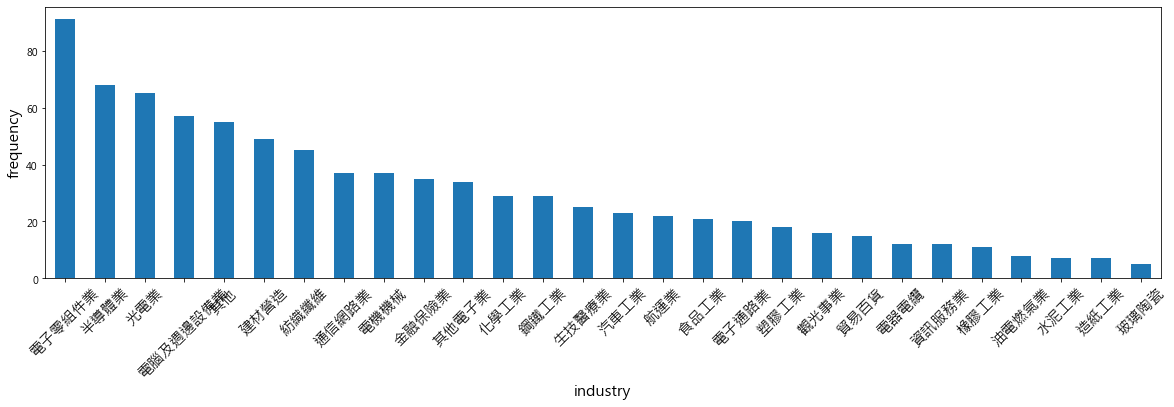

In [56]:
plt.figure(figsize=(20,5))
pd.value_counts(df['industry']).plot.bar()
plt.xlabel('industry', fontsize=15)
plt.ylabel('frequency', fontsize=15)
plt.xticks(rotation=45, fontsize=15)
plt.show()

### 延伸參考
**[點擊這裡](https://pylibraries.com/matplotlib/tutorials/grouped-bar-charts-with-matplotlib-pyplot/)可以看到很多非常實用的例子**

### `Matplotlib` 還可以做什麼？
**`Matplotlib` 可以做到的事情很多，只要上網找的對關鍵字，都會有許許多多的程式碼可以參考，這裡給出除了上述的繪圖之外還有哪些例子。程式碼有興趣才仔細看，這裡只是為了帶入 `Matplotlib` 配合其他套件如 `seaborn`, `wordcloud` 等可以呈現什麼樣的圖片**

* **1. 配合 `seaborn`**

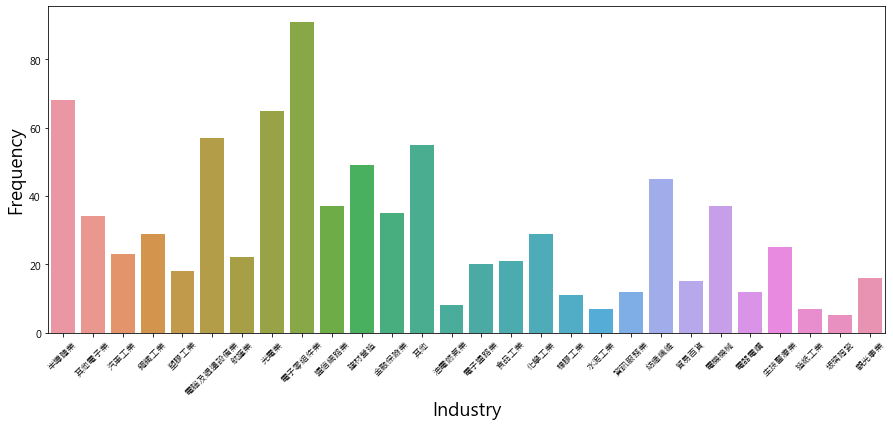

In [57]:
import seaborn as sns
plt.figure(figsize=(15,6))
sns.countplot('industry', data=df)
plt.xticks(rotation=45, fontsize=9) # 產業名稱可能會太長，將它們旋轉成45度顯示會比較美觀
plt.xlabel('Industry', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.show()

* **2. 配合 `wordcloud`** 

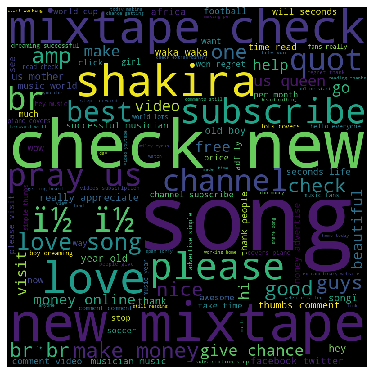

In [58]:
from wordcloud import WordCloud, STOPWORDS

df_youtube = pd.read_csv(r"common files/Youtube05-Shakira.csv", encoding ="latin-1")

comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df_youtube.CONTENT:
    tokens = str(val).split()
    
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
        
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='black',
                      stopwords = stopwords,
                      min_font_size = 10).generate(comment_words)

plt.figure(figsize=(5,5),facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

### Exercises
* **1. 參考使用 `pyplot.subplot`的程式碼，如果將 `plt.savefig()` 放在 `plt.show()` 之後才執行會發生什麼事?**
* **2. 可以發現最一開始畫的長條圖(Bar Chart)顏色只有藍色，嘗試對 `plt.bar()` 做一些設定使得每個bar的顏色不同。(Hint: https://showmecode.info/matplotlib/bar/change-bar-color/)**
* **3. 從上述的Bar Chart例子可以發現都是縱向的Bars，請嘗試繪出橫向的Bar Chart。(Hint: https://datatofish.com/horizontal-bar-chart-matplotlib/)**

---
### References
* 1. [read(), readline(), readlines()的差別](https://codertw.com/%E7%A8%8B%E5%BC%8F%E8%AA%9E%E8%A8%80/364743/)
* 2. [open()讀取非英文檔案文字的設定](https://stackoverflow.com/questions/9233027/unicodedecodeerror-charmap-codec-cant-decode-byte-x-in-position-y-character)
* 3. [使用 with open() as 來讀取或寫入檔案](https://www.itread01.com/content/1549615343.html)
* 4. [27 Numpy Operations for Beginners](https://towardsdatascience.com/27-things-that-a-beginner-needs-to-know-about-numpy-edda217fb662)
* 5. [dropna vs drop vs fillna](https://www.itread01.com/content/1544495051.html)
* 6. [解決Python 3 Matplotlib與Seaborn視覺化套件中文顯示問題](https://medium.com/marketingdatascience/%E8%A7%A3%E6%B1%BApython-3-matplotlib%E8%88%87seaborn%E8%A6%96%E8%A6%BA%E5%8C%96%E5%A5%97%E4%BB%B6%E4%B8%AD%E6%96%87%E9%A1%AF%E7%A4%BA%E5%95%8F%E9%A1%8C-f7b3773a889b)
* 7. [wordcloud 範例資料取自這裡](https://archive.ics.uci.edu/ml/machine-learning-databases/00380/)
* 8. [wordcloud code example](https://www.geeksforgeeks.org/generating-word-cloud-python/)
* 9. [wordcloud](https://amueller.github.io/word_cloud/auto_examples/a_new_hope.html)